# Objective

WAP to evaluate the performance of implemented three-layer neural network with variations in activation functions, size of hidden layer, learning rate, batch size and number of epochs.

# Description of the Model

This model is a simple feedforward neural network (FNN) and backpropagation neural network(BPNN) designed for classifying handwritten digits from the MNIST dataset. The architecture consists of:

    

*   Input Layer: 784 neurons (flattened 28×28 grayscale images)
*    Hidden Layer 1 and Hidden Layer 2: are varied in range [(160, 100), (100, 100), (100, 160), (60, 60), (100, 60)] with activation function as Relu

*    Output Layer: 10 neurons (one for each digit 0-9), using raw logits

*    Learning Rate:is also varied between [0.01, 0.1, 1]
*   Loss Function: Softmax cross-entropy


*   Optimizer: Adam Optimizer


*   Performance Metric: Accuracy,loss curves, confusion matrix   


The model is trained for 50 epochs with batch size = 10.

# Python Implementation

Training with hidden layers (160, 100) and learning rate 0.01
Epoch 1, Loss: 0.2519, Accuracy: 92.56%
Epoch 2, Loss: 0.1703, Accuracy: 94.90%
Epoch 3, Loss: 0.1606, Accuracy: 95.33%
Epoch 4, Loss: 0.1451, Accuracy: 95.71%
Epoch 5, Loss: 0.1433, Accuracy: 95.81%
Epoch 6, Loss: 0.1330, Accuracy: 96.13%
Epoch 7, Loss: 0.1367, Accuracy: 96.04%
Epoch 8, Loss: 0.1329, Accuracy: 96.06%
Epoch 9, Loss: 0.1301, Accuracy: 96.19%
Epoch 10, Loss: 0.1252, Accuracy: 96.44%
Epoch 11, Loss: 0.1221, Accuracy: 96.46%
Epoch 12, Loss: 0.1173, Accuracy: 96.63%
Epoch 13, Loss: 0.1195, Accuracy: 96.59%
Epoch 14, Loss: 0.1161, Accuracy: 96.73%
Epoch 15, Loss: 0.1181, Accuracy: 96.62%
Epoch 16, Loss: 0.1099, Accuracy: 96.83%
Epoch 17, Loss: 0.1122, Accuracy: 96.80%
Epoch 18, Loss: 0.1092, Accuracy: 96.83%
Epoch 19, Loss: 0.1107, Accuracy: 96.83%
Epoch 20, Loss: 0.1118, Accuracy: 96.84%
Epoch 21, Loss: 0.1127, Accuracy: 96.84%
Epoch 22, Loss: 0.1136, Accuracy: 96.77%
Epoch 23, Loss: 0.1061, Accuracy: 97.04%
Epoc

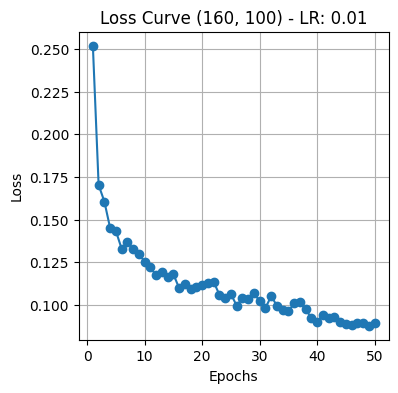

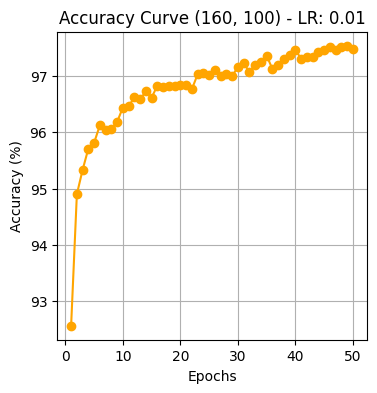

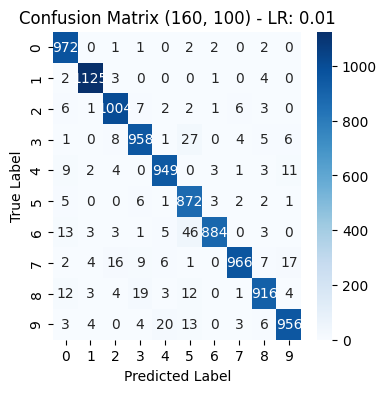

Execution Time: 463.15 seconds

Results for hidden layers (160, 100) and learning rate 0.1


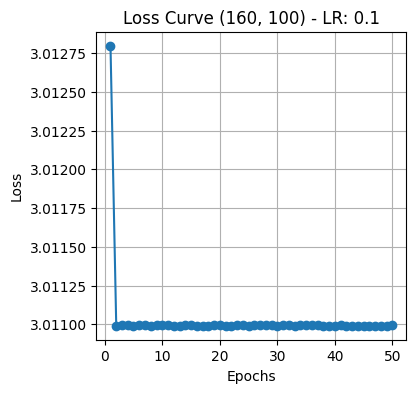

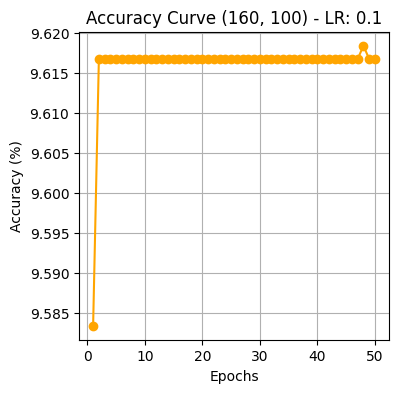

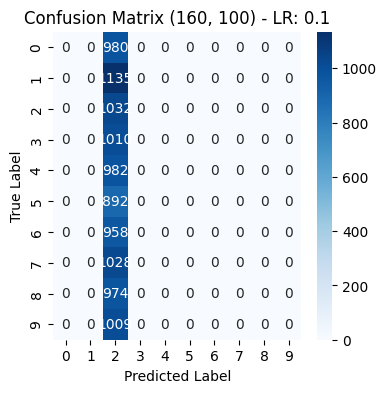

Execution Time: 434.31 seconds

Results for hidden layers (160, 100) and learning rate 1


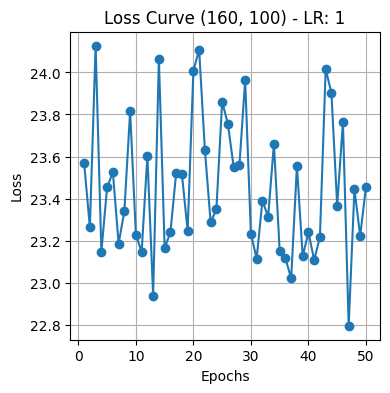

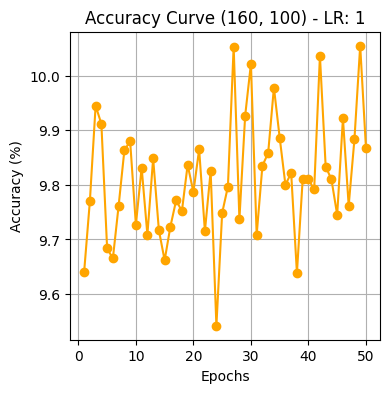

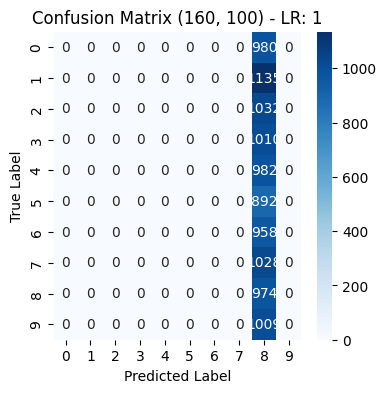

Execution Time: 431.91 seconds

Results for hidden layers (100, 100) and learning rate 0.01


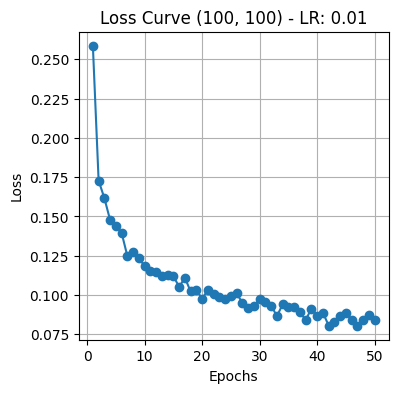

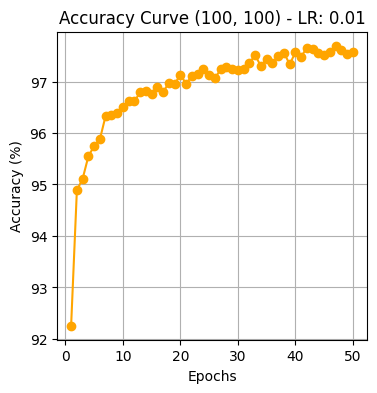

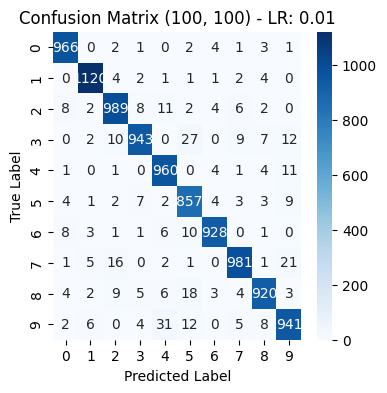

Execution Time: 430.09 seconds

Results for hidden layers (100, 100) and learning rate 0.1


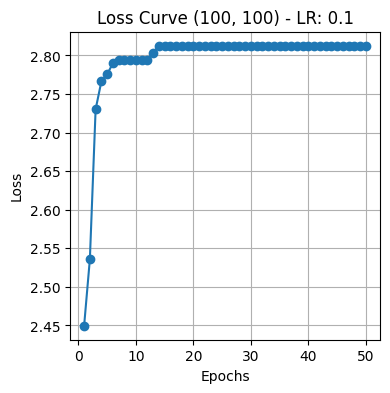

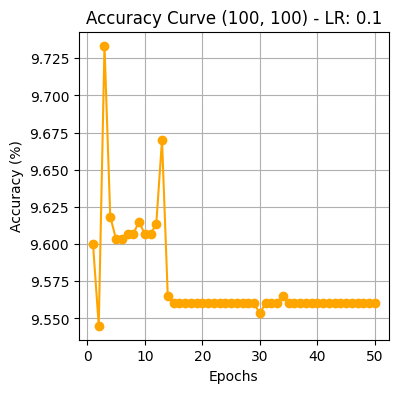

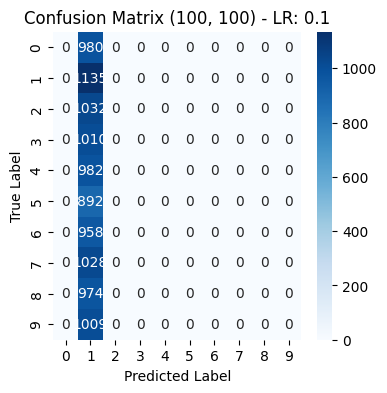

Execution Time: 437.37 seconds

Results for hidden layers (100, 100) and learning rate 1


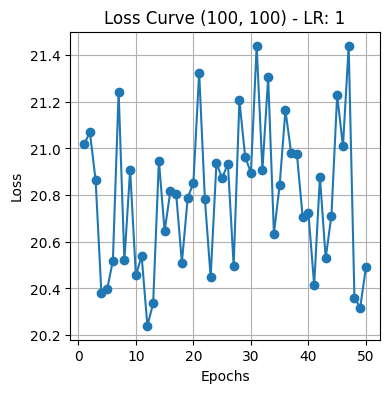

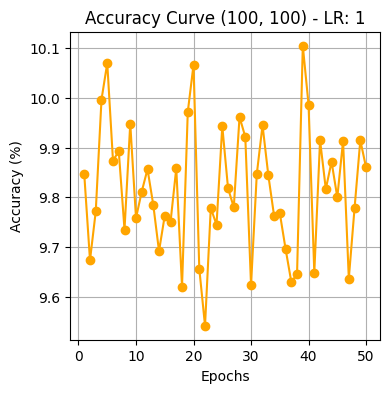

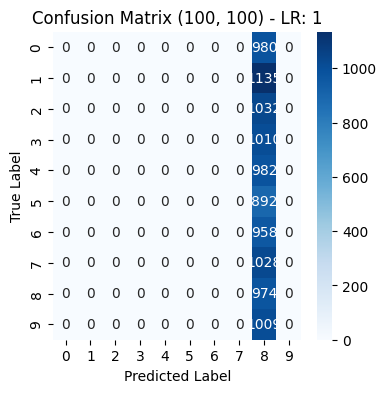

Execution Time: 429.29 seconds

Results for hidden layers (100, 160) and learning rate 0.01


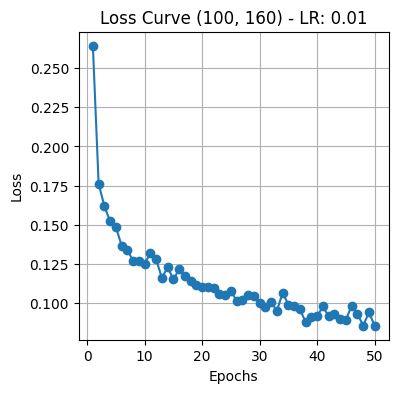

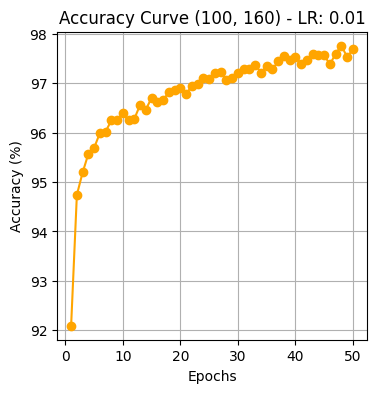

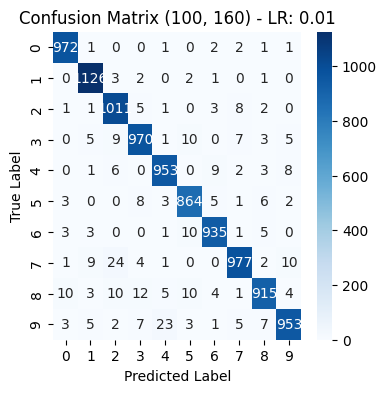

Execution Time: 430.87 seconds

Results for hidden layers (100, 160) and learning rate 0.1


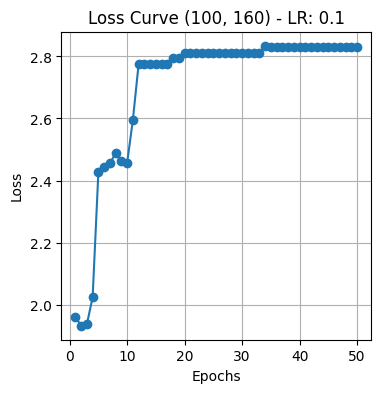

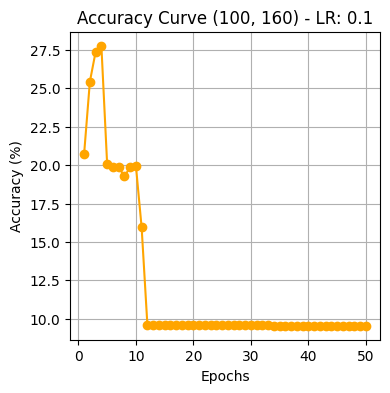

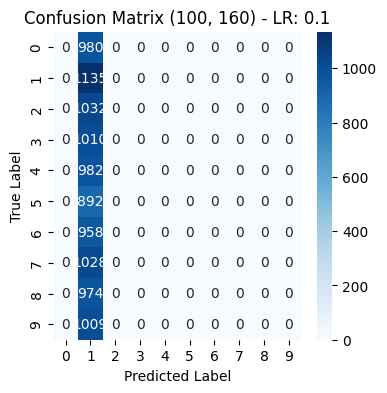

Execution Time: 431.17 seconds

Results for hidden layers (100, 160) and learning rate 1


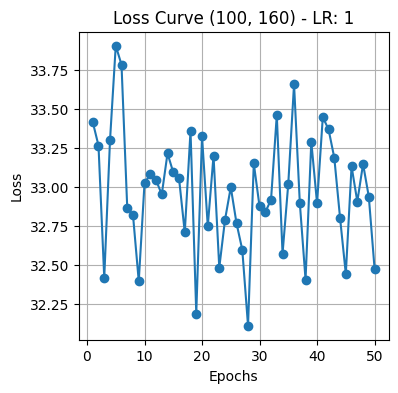

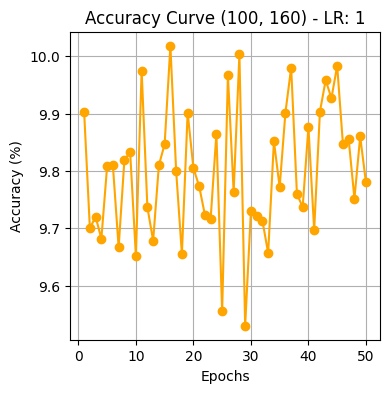

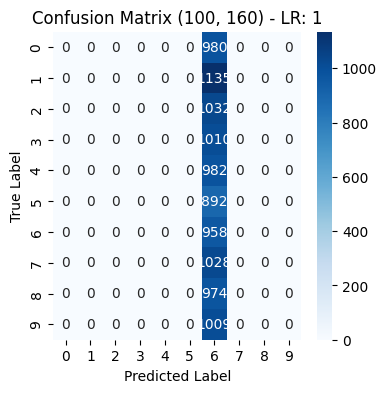

Execution Time: 431.74 seconds

Results for hidden layers (60, 60) and learning rate 0.01


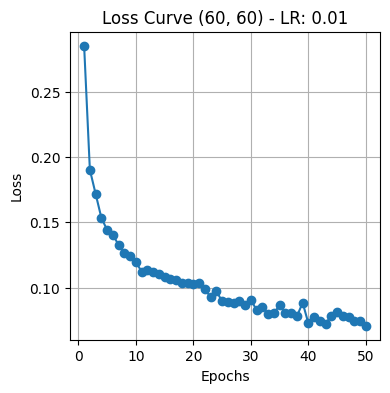

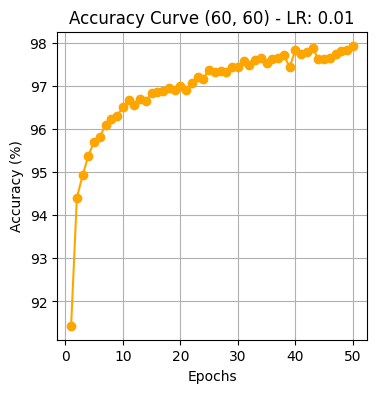

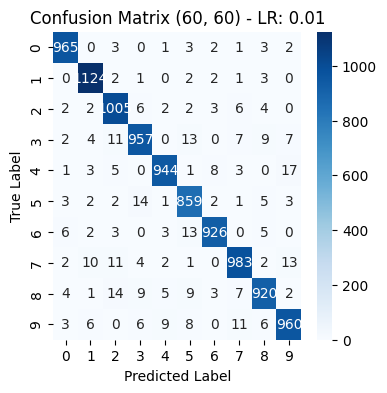

Execution Time: 432.83 seconds

Results for hidden layers (60, 60) and learning rate 0.1


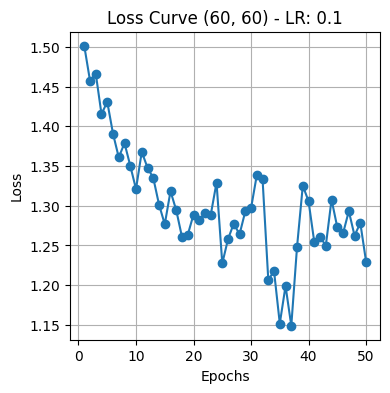

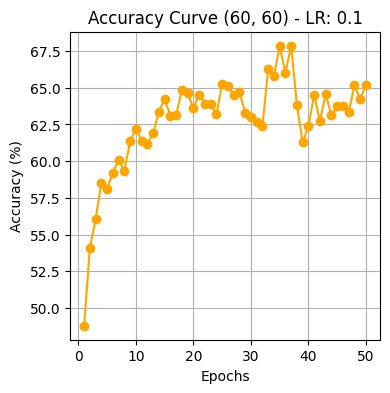

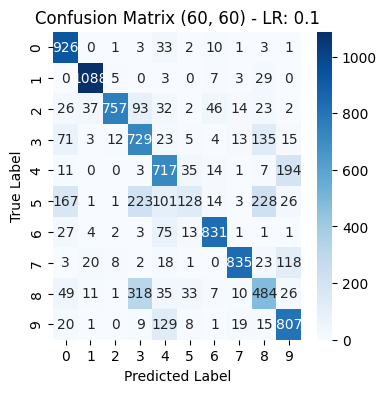

Execution Time: 429.31 seconds

Results for hidden layers (60, 60) and learning rate 1


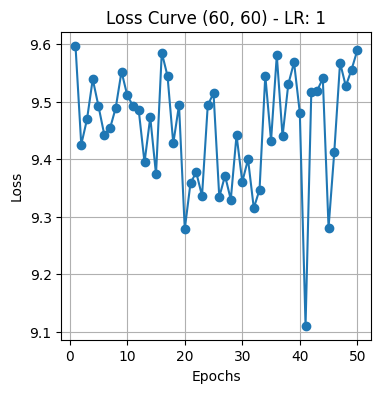

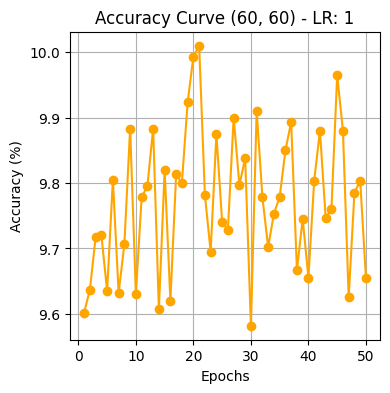

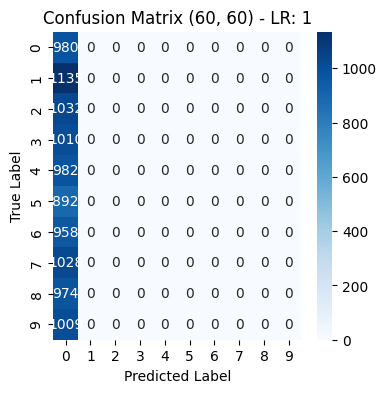

Execution Time: 426.68 seconds

Results for hidden layers (100, 60) and learning rate 0.01


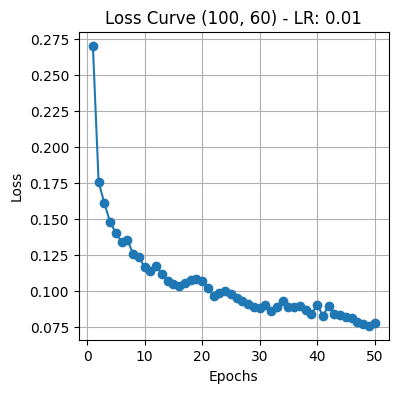

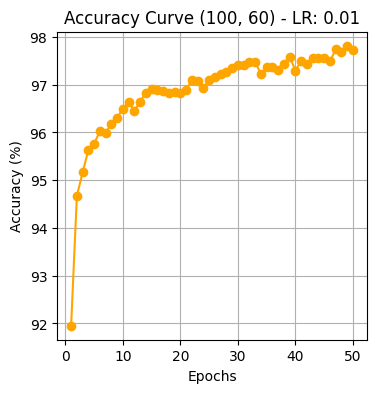

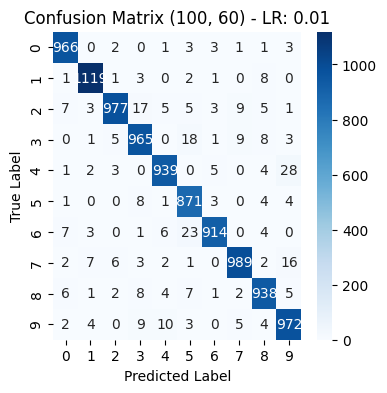

Execution Time: 430.32 seconds

Results for hidden layers (100, 60) and learning rate 0.1


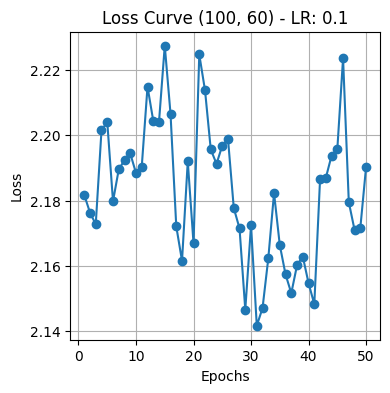

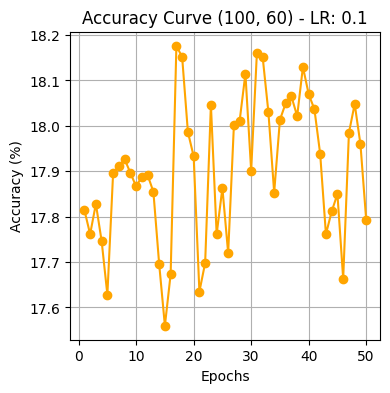

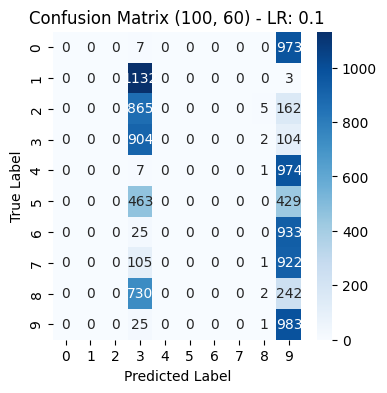

Execution Time: 432.78 seconds

Results for hidden layers (100, 60) and learning rate 1


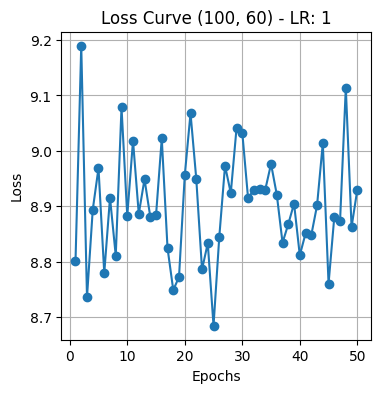

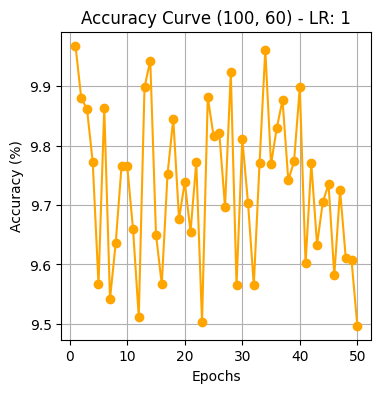

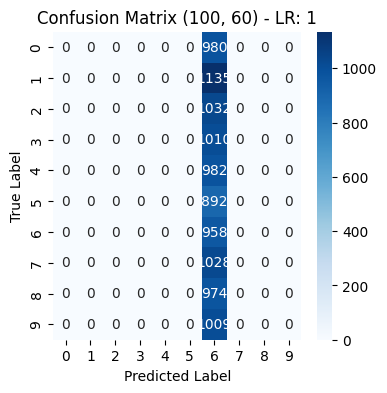

Execution Time: 437.72 seconds



In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import confusion_matrix

# Disable eager execution
tf.compat.v1.disable_eager_execution()

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape input data
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# One-hot encoding for labels
y_train_onehot = np.eye(10)[y_train]
y_test_onehot = np.eye(10)[y_test]

# Hyperparameters
epochs = 50
batch_size = 10
hidden_layer_sizes = [(160, 100), (100, 100), (100, 160), (60, 60), (100, 60)]
learning_rates = [0.01, 0.1, 1]

results = {}

for h1, h2 in hidden_layer_sizes:
    for lr in learning_rates:
        print(f"Training with hidden layers ({h1}, {h2}) and learning rate {lr}")

        tf.compat.v1.reset_default_graph()

        # Define placeholders
        X = tf.compat.v1.placeholder(tf.float32, [None, 784])
        Y = tf.compat.v1.placeholder(tf.float32, [None, 10])

        # Initialize weights and biases
        def init_weights(shape):
            return tf.Variable(tf.random.normal(shape, stddev=0.1))

        W1, b1 = init_weights([784, h1]), tf.Variable(tf.zeros([h1]))
        W2, b2 = init_weights([h1, h2]), tf.Variable(tf.zeros([h2]))
        W3, b3 = init_weights([h2, 10]), tf.Variable(tf.zeros([10]))

        # Forward propagation
        def forward_propagation(X):
            a1 = tf.nn.sigmoid(tf.matmul(X, W1) + b1)
            a2 = tf.nn.sigmoid(tf.matmul(a1, W2) + b2)
            return tf.matmul(a2, W3) + b3

        logits = forward_propagation(X)
        y_pred = tf.nn.softmax(logits)

        # Loss and optimizer
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
        optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=lr).minimize(loss)

        # Accuracy metric
        correct_pred = tf.equal(tf.argmax(y_pred, 1), tf.argmax(Y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

        loss_history = []
        accuracy_history = []

        start_time = time.time()
        with tf.compat.v1.Session() as sess:
            sess.run(tf.compat.v1.global_variables_initializer())

            for epoch in range(epochs):
                epoch_loss, epoch_acc = 0, 0
                num_batches = x_train.shape[0] // batch_size

                for i in range(0, x_train.shape[0], batch_size):
                    batch_x, batch_y = x_train[i:i+batch_size], y_train_onehot[i:i+batch_size]
                    _, batch_loss, batch_acc = sess.run([optimizer, loss, accuracy], feed_dict={X: batch_x, Y: batch_y})
                    epoch_loss += batch_loss
                    epoch_acc += batch_acc

                epoch_loss /= num_batches
                epoch_acc = (epoch_acc / num_batches) * 100
                loss_history.append(epoch_loss)
                accuracy_history.append(epoch_acc)
                print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

            # Evaluate on test set
            test_acc = sess.run(accuracy, feed_dict={X: x_test, Y: y_test_onehot}) * 100
            print(f"\nTest Accuracy: {test_acc:.2f}%")

            # Confusion matrix
            y_pred_labels = sess.run(tf.argmax(y_pred, 1), feed_dict={X: x_test})
            cm = confusion_matrix(y_test, y_pred_labels)

            execution_time = time.time() - start_time
            print(f"Execution Time: {execution_time:.2f} seconds")

            results[(h1, h2, lr)] = {
                "loss_history": loss_history,
                "accuracy_history": accuracy_history,
                "confusion_matrix": cm,
                "test_accuracy": test_acc,
                "execution_time": execution_time
            }

# Plot results
for key, value in results.items():
    h1, h2, lr = key
    print(f"Results for hidden layers ({h1}, {h2}) and learning rate {lr}")

    # Plot loss curve
    plt.figure(figsize=(4, 4))
    plt.plot(range(1, epochs + 1), value["loss_history"], marker='o', linestyle='-')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Loss Curve ({h1}, {h2}) - LR: {lr}')
    plt.grid()
    plt.show()

    # Plot accuracy curve
    plt.figure(figsize=(4, 4))
    plt.plot(range(1, epochs + 1), value["accuracy_history"], marker='o', linestyle='-', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title(f'Accuracy Curve ({h1}, {h2}) - LR: {lr}')
    plt.grid()
    plt.show()

    # Plot confusion matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(value["confusion_matrix"], annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix ({h1}, {h2}) - LR: {lr}')
    plt.show()

    print(f"Execution Time: {value['execution_time']:.2f} seconds\n")


# Description of Code

1. **Implementation:** Uses TensorFlow 1.x compatibility mode in TensorFlow 2.x.  

2. **Data Preprocessing:**  
   - MNIST dataset is loaded and normalized (pixel values scaled to [0,1]).  
   - Images reshaped into 1D arrays of size 784.  
   - Labels converted to one-hot encoded vectors.  

3. **Model Definition:**  
   - Feedforward neural network with two configurable hidden layers.  
   - ReLU activation in hidden layers, softmax in the output layer.  
   - Weights initialized using random normal distribution; biases initialized to zeros.  

4. **Training Setup:**  
   - Trained using Adam optimizer and cross-entropy loss.  
   - 50 epochs with batch size of 10.  
   - Uses placeholders for inputs and labels (TensorFlow 1.x graph execution).  

5. **Hyperparameter Tuning:**  
   - 15 configurations tested with varying hidden layer sizes (5 combinations).  
   - Learning rates tested: 0.01, 0.1, and 1.  
   - Goal: Analyze impact of configurations on model performance.  



# Performance Evaluation


    

*  Accuracy Curves: The model's accuracy is computed fordifferent hyperparameter settings.
*  Loss Curve: Used to monitor convergence and model stability over epochs.

*  Confusion Matrix: Used to analyze classification errors.   


# My Comments

1.Accuracy for learning rate (0.01 (approx 96%) > 0.1 (approx 11 % ) > 1 (approx 9%)).

2.Fixed batch size may not be optimal for all configurations.

4.For less learning rate high accuracy.

5.For high learning rate low accuracy.

6.The training time is high because of large epochs and a small batch size.